In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from math import pi
import matplotlib.colors as mcolors
from matplotlib import colormaps
import plotly.graph_objects as go
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import json
import ast


data = pd.read_csv('movies.csv')

# LINE GRAPH OF MOVIE RELEASE COUNTS OVER TIME BY GENRE

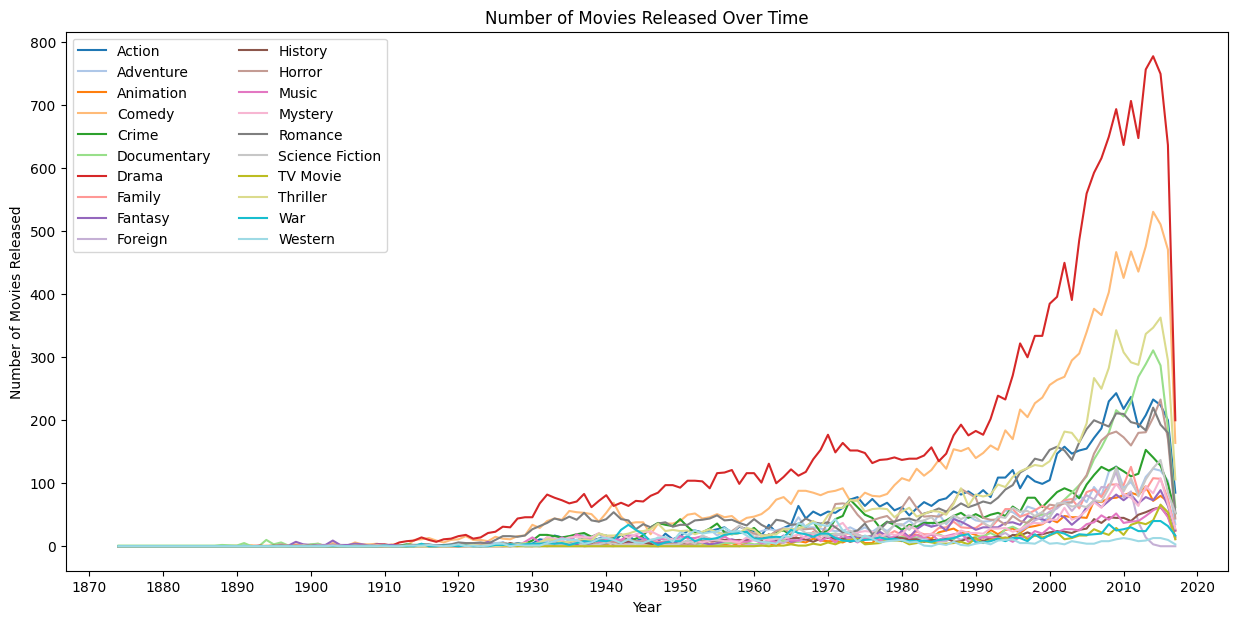

In [177]:
data = pd.read_csv('movies.csv')

# Convert release_date to datetime and extract the year
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')
data['year'] = data['release_date'].dt.year

# Clean the genre_list to a list of genres
data['genre_list'] = data['genre_list'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else [])

# Aggregate the data
genre_counts = data.explode('genre_list').groupby(['year', 'genre_list']).size().reset_index(name='count')

# Pivot the data for the line plot
genre_counts_pivot = genre_counts.pivot(index='year', columns='genre_list', values='count').fillna(0)



plt.figure(figsize=(15, 7))

# Choose a colormap
colormap = plt.cm.tab20  # You can change this to other colormaps, like 'viridis' if you prefer
color_cycle = [colormap(i) for i in range(colormap.N)]

# Assign colors from the cycle
for idx, genre in enumerate(genre_counts_pivot.columns):
    plt.plot(genre_counts_pivot.index, genre_counts_pivot[genre], label=genre, color=color_cycle[idx])

plt.title('Number of Movies Released Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.legend(ncol=2)

ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(10)) 
plt.show()

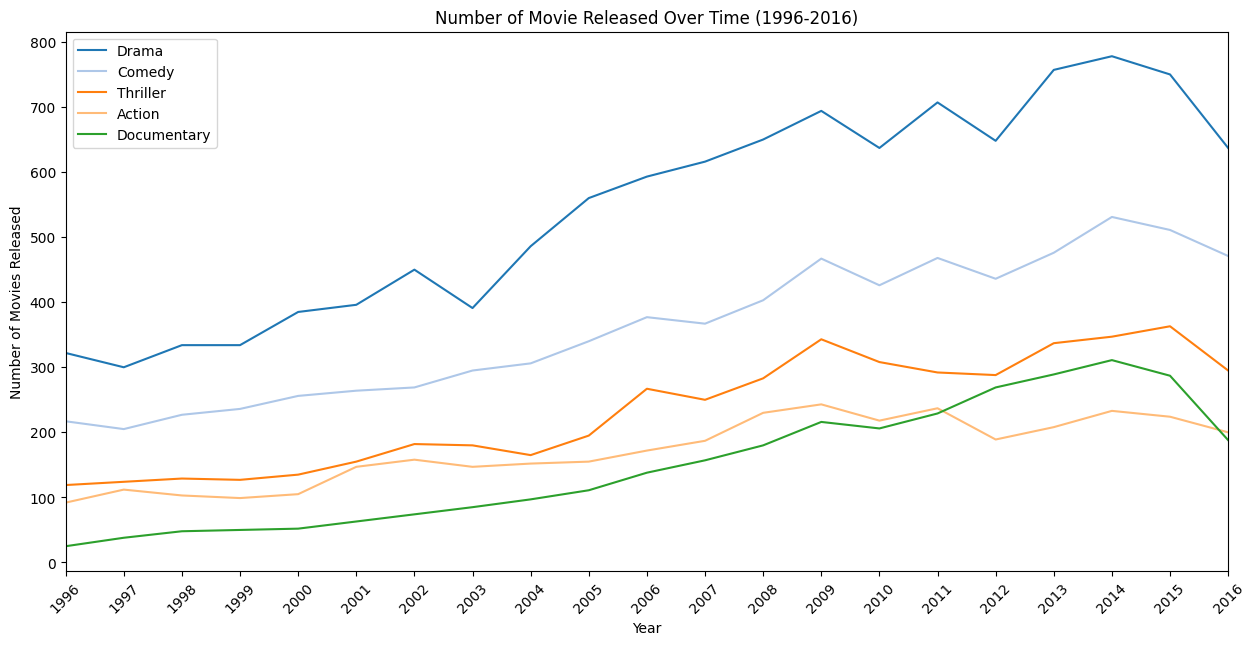

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Read the CSV file
data = pd.read_csv('movies.csv')

# Convert 'release_date' column to datetime
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')
data['year'] = data['release_date'].dt.year

# Filter the DataFrame for dates between 1996 and 2016 inclusive
data = data[(data['year'] >= 1996) & (data['year'] <= 2016)]

# Clean the 'genre_list' to a list of genres
data['genre_list'] = data['genre_list'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else [])

# Filter for only certain genres
selected_genres = ['Drama', 'Comedy', 'Thriller', 'Action', 'Documentary']  # Specify your genres here
data = data[data['genre_list'].apply(lambda genres: any(genre in selected_genres for genre in genres))]

# Aggregate the data
genre_counts = data.explode('genre_list').groupby(['year', 'genre_list']).size().reset_index(name='count')

# Further filter the aggregated data to only the selected genres
genre_counts = genre_counts[genre_counts['genre_list'].isin(selected_genres)]

# Pivot the data for the line plot
genre_counts_pivot = genre_counts.pivot(index='year', columns='genre_list', values='count').fillna(0)

plt.figure(figsize=(15, 7))

# Choose a colormap
colormap = plt.cm.tab20  # You can change this to other colormaps, like 'viridis' if you prefer
color_cycle = [colormap(i) for i in range(colormap.N)]

# Assign colors from the cycle for each genre
for idx, genre in enumerate(selected_genres):
    if genre in genre_counts_pivot.columns:
        plt.plot(genre_counts_pivot.index, genre_counts_pivot[genre], label=genre, color=color_cycle[idx % len(color_cycle)])

plt.title('Number of Movie Released Over Time (1996-2016)')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.legend()

ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.set_xlim([1996, 2016])  # Set the x-axis limit to only show 1996-2016
plt.xticks(rotation=45)
plt.show()


# Number of Movies Released by Year and Month

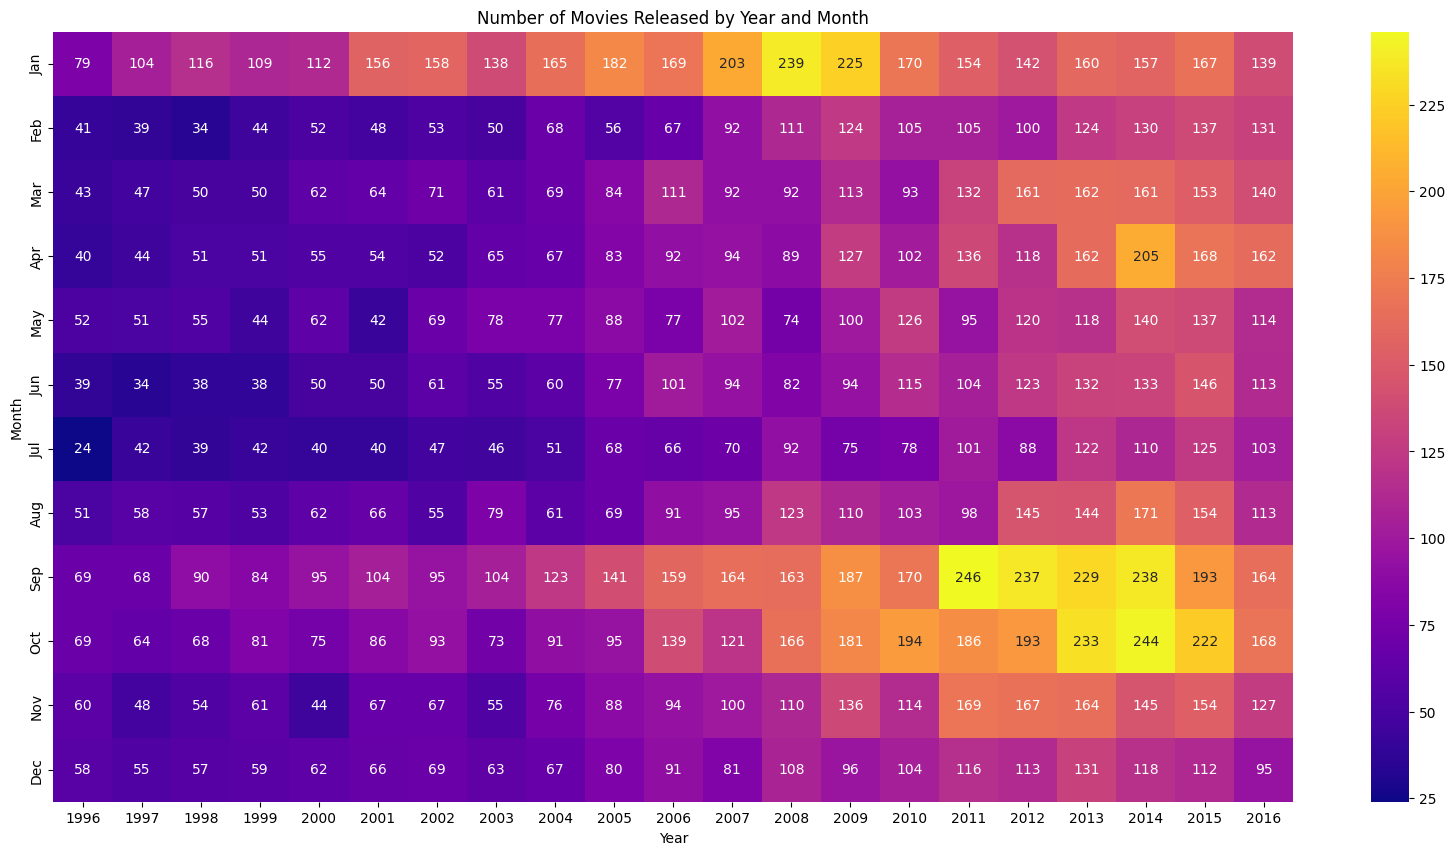

In [179]:
# Read the CSV file
df = pd.read_csv('movies.csv')

# Convert 'release_date' column to datetime without a specific format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Filter the DataFrame for dates from 2010 onwards
df = df[(df['release_date'].dt.year >= 1996) & (df['release_date'].dt.year <= 2016)]


# Extract year and month
df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month

# Create a pivot table for the number of releases by year and month
pivot_table = df.pivot_table(index='month', columns='year', aggfunc='size', fill_value=0)

# Create the heatmap
plt.figure(figsize=(20,10))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap='plasma')
plt.title('Number of Movies Released by Year and Month')
plt.xlabel('Year')
plt.ylabel('Month')
plt.yticks([i+0.5 for i in range(12)], 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
           va='center')
plt.show()


# Boxplot of  movie rating and vote count by genre

C:\Users\FredS\AppData\Local\Temp\ipykernel_12284\1599092214.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\FredS\AppData\Local\Temp\ipykernel_12284\1599092214.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\FredS\AppData\Local\Temp\ipykernel_12284\1599092214.py:40: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\FredS\AppData\Local\Temp\ipykernel_12284\1599092214.py:41: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\FredS\AppData\Local\Temp\ipykernel_12284\1599092214.py:63: UserWarning:

This figure incl

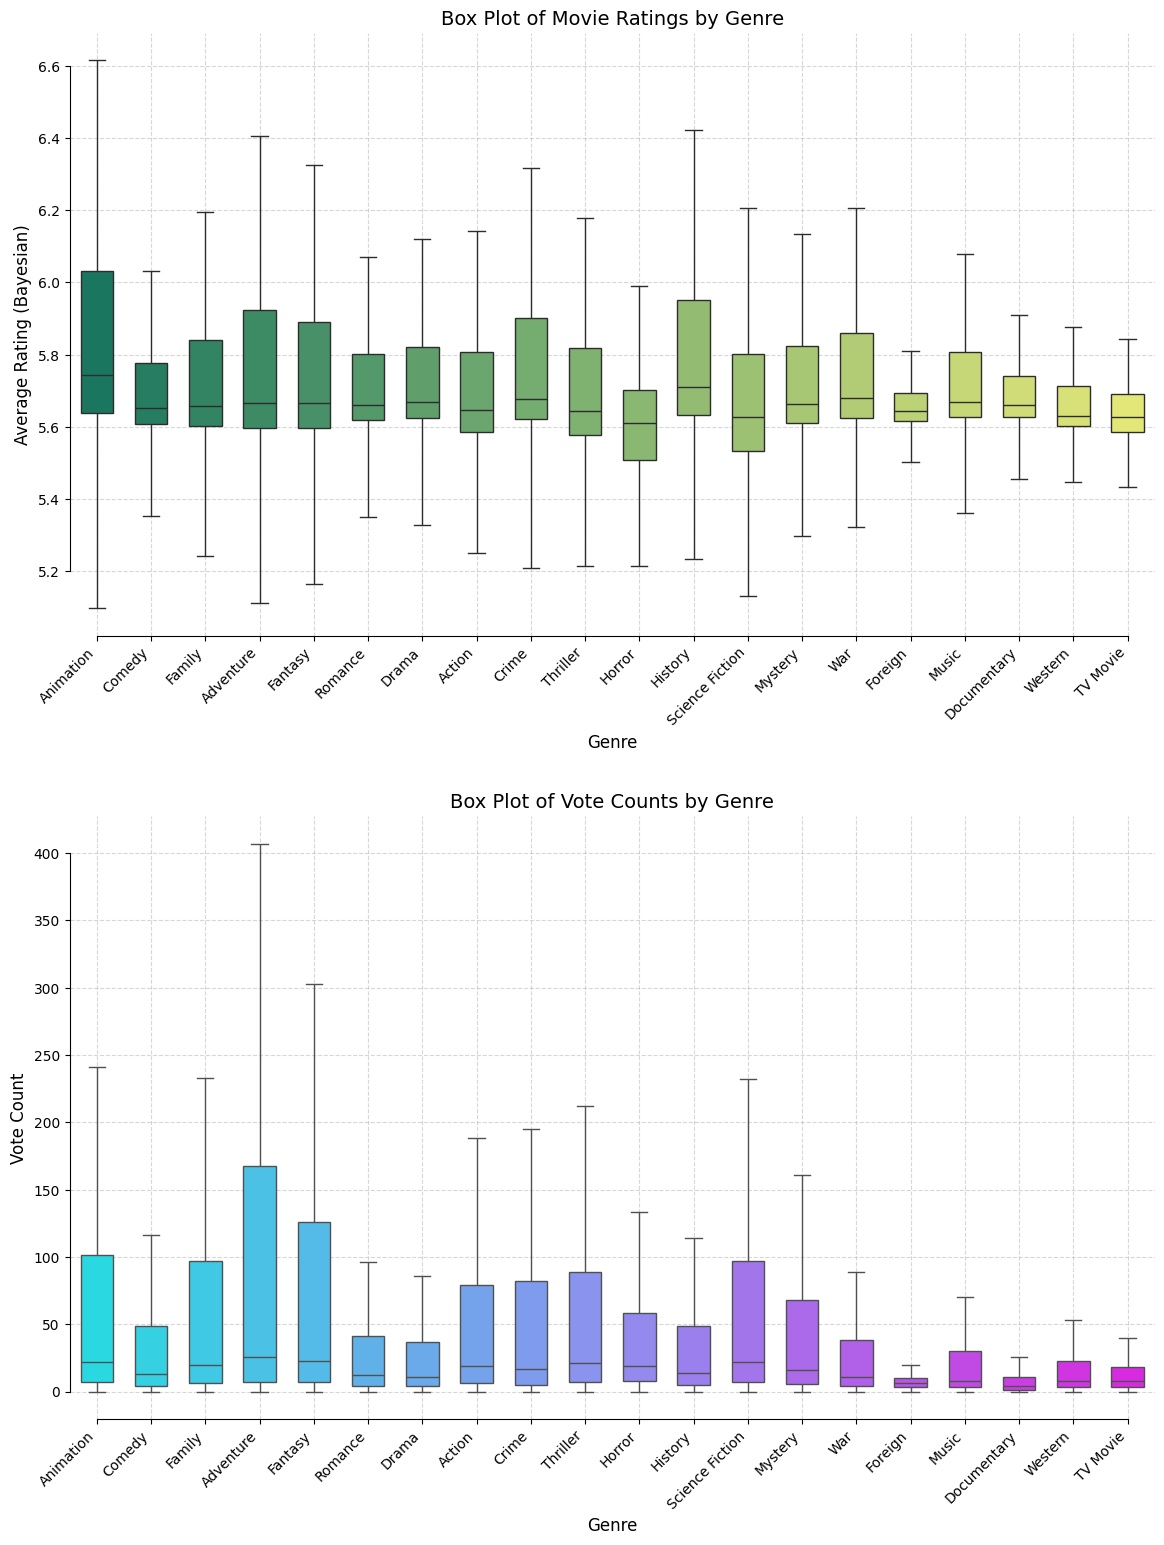

In [180]:
data = pd.read_csv('movies.csv')

# Convert strings to lists safely
data['genre_list'] = data['genre_list'].apply(lambda x: eval(x) if isinstance(x, str) and x.startswith('[') else [])
data_exploded = data.explode('genre_list')

# Convert columns to numeric
data_exploded['bayesian_average'] = pd.to_numeric(data_exploded['bayesian_average'], errors='coerce')
data_exploded['vote_count'] = pd.to_numeric(data_exploded['vote_count'], errors='coerce')

# Drop NA values
data_exploded = data_exploded.dropna(subset=['genre_list', 'bayesian_average', 'vote_count'])

# Create a larger figure for subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 18), gridspec_kw={'height_ratios': [1, 1], 'hspace': 0.3})

# First subplot for bayesian_average
sns.boxplot(
    x='genre_list',
    y='bayesian_average',
    data=data_exploded,
    showfliers=False,
    palette="summer",
    width=0.6,
    ax=ax1
)

# Second subplot for vote_count
sns.boxplot(
    x='genre_list',
    y='vote_count',
    data=data_exploded,
    showfliers=False,
    palette="cool",
    width=0.6,
    ax=ax2
)

# Rotate x-tick labels for better visibility and space management
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right", fontsize=10)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha="right", fontsize=10)

# Increase y-tick label size for readability
ax1.tick_params(axis='y', labelsize=10)
ax2.tick_params(axis='y', labelsize=10)

# Improve the title and axis labels for clarity and readability
ax1.set_title('Box Plot of Movie Ratings by Genre', fontsize=14)
ax2.set_title('Box Plot of Vote Counts by Genre', fontsize=14)
ax1.set_xlabel('Genre', fontsize=12)
ax1.set_ylabel('Average Rating (Bayesian)', fontsize=12)
ax2.set_xlabel('Genre', fontsize=12)
ax2.set_ylabel('Vote Count', fontsize=12)

# Despine the plots for a cleaner look
sns.despine(trim=True, ax=ax1)
sns.despine(trim=True, ax=ax2)

# Optionally, add a grid for easier reading of values
ax1.grid(True, linestyle='--', alpha=0.5)
ax2.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()  # Adjust the plot to ensure everything fits without overlap
plt.show()


# HISTOGRAM OF BAYESIAN AVG SCORES

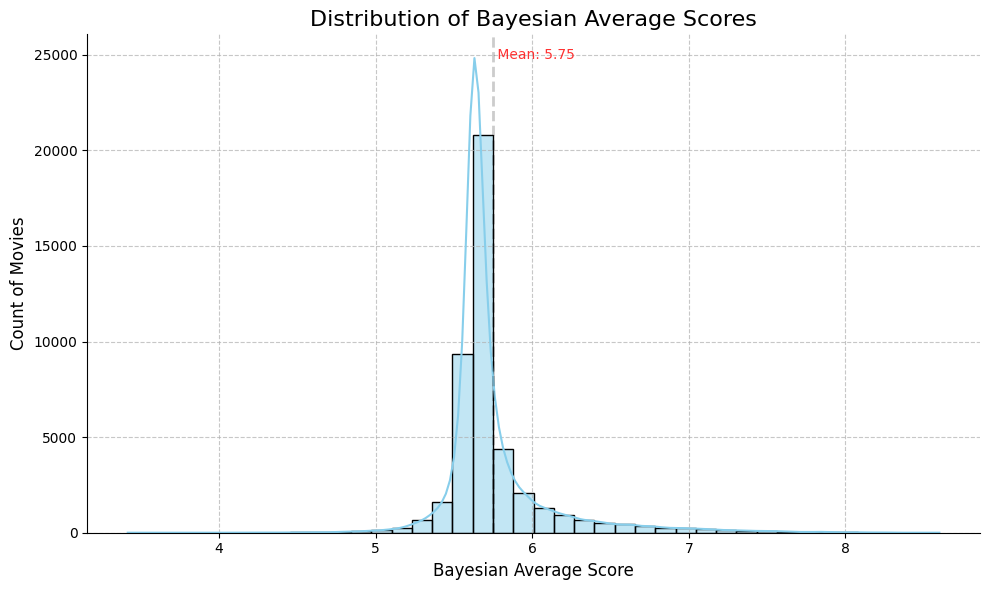

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('movies.csv')

# Ensure 'bayesian_average' is a float and drop NaN values
data['bayesian_average'] = pd.to_numeric(data['bayesian_average'], errors='coerce')
filtered_data = data.dropna(subset=['bayesian_average'])

# Plotting the histogram of Bayesian average scores
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['bayesian_average'], bins=40, kde=True, color='skyblue', edgecolor='black')

# Add a vertical line for the mean
mean_score = filtered_data['bayesian_average'].mean()
plt.axvline(mean_score, color='black', linestyle='dashed', linewidth=2, alpha=0.2)

# Annotate the mean line
plt.text(mean_score, plt.gca().get_ylim()[1] * 0.95, f' Mean: {mean_score:.2f}', color='red', ha='left',
         alpha=0.8)

# Improve title and axis labels
plt.title('Distribution of Bayesian Average Scores', fontsize=16)
plt.xlabel('Bayesian Average Score', fontsize=12)
plt.ylabel('Count of Movies', fontsize=12)

# Refine grid
plt.grid(True, linestyle='--', alpha=0.7)

# Despine for a cleaner look
sns.despine()

plt.tight_layout()
plt.show()


# SCATTERPLOT OF BAYESIAN AVG SCORES VS VOTE AVG

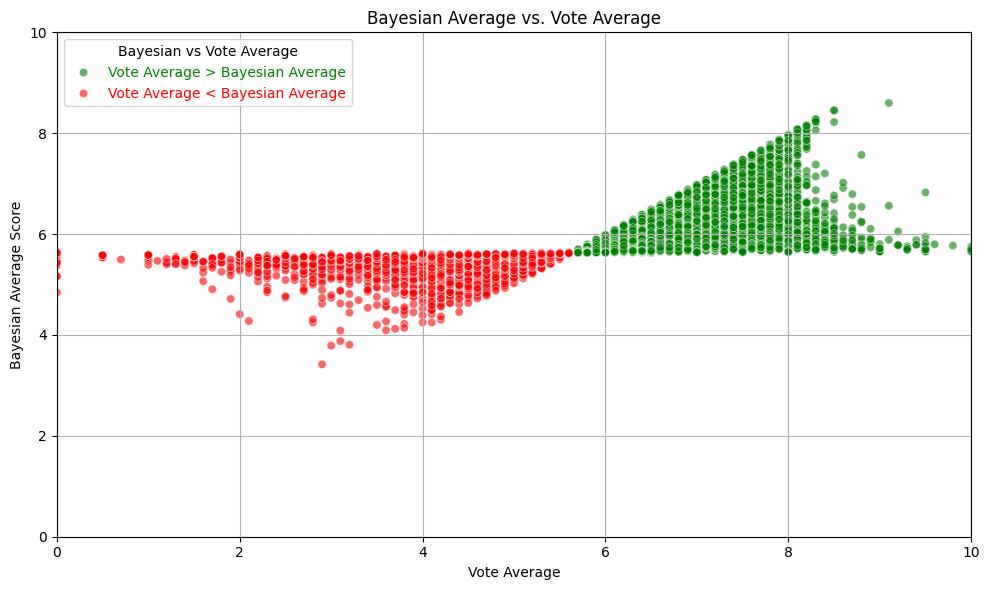

In [182]:
data = pd.read_csv('movies.csv')

# Convert columns to numeric and drop NaNs
data['vote_average'] = pd.to_numeric(data['vote_average'], errors='coerce')
data['bayesian_average'] = pd.to_numeric(data['bayesian_average'], errors='coerce')
filtered_data = data.dropna(subset=['vote_average', 'bayesian_average'])

# Create a new column for the color condition
filtered_data['color_condition'] = filtered_data.apply(lambda x: 'Vote Average < Bayesian Average' if x['bayesian_average'] > x['vote_average'] else 'Vote Average > Bayesian Average', axis=1)

# Plotting the scatter plot with color gradient
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=filtered_data, x='vote_average', y='bayesian_average',
    hue='color_condition', alpha=0.6, palette=['green', 'red']
)

# Create the legend
legend = plt.legend(title='Bayesian vs Vote Average')

# Customize the colors of legend text
legend.get_texts()[0].set_color('green')  # "Bayesian < Vote Average" color
legend.get_texts()[1].set_color('red')    # "Bayesian > Vote Average" color

plt.title('Bayesian Average vs. Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Bayesian Average Score')
plt.grid(True)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.tight_layout()
plt.show()


# SANKEY DIAGRAM OF GENRE TO TOTAL REVENUE

In [205]:
data = pd.read_csv('movies.csv')

# Explode the genre_list if it's in list format stored as strings
data['genre_list'] = data['genre_list'].apply(lambda x: eval(x) if isinstance(x, str) else x)
data = data.explode('genre_list')

# Aggregate revenue by genre
genre_revenue = data.groupby('genre_list')['revenue'].sum().reset_index()

# Lists for the sources, targets, and values for the Sankey diagram
source = [i for i in range(len(genre_revenue))]  # indices of genres
target = [len(genre_revenue)] * len(genre_revenue)  # Single target for all flows
value = genre_revenue['revenue'].tolist()  # Revenue values
labels = genre_revenue['genre_list'].tolist() + ['Total Revenue']  # All genre labels and one 'Total Revenue'



colors = px.colors.qualitative.Set2
# Create a color mapping that assigns each genre a color
color_map = {genre: colors[i % len(colors)] for i, genre in enumerate(labels[:-1])}

# Lists for colors of the nodes and links
node_colors = [color_map[label] if label in color_map else 'rgba(150,150,150,0.5)' for label in labels]

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=node_colors  # Set the node colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=[color_map[labels[s]] for s in source]  # Set the link colors based on source node
    )
)])

fig.update_layout(title_text='Sankey Diagram of Genre to Revenue', font_size=12)
fig.show()


# Heatmap of Movie features

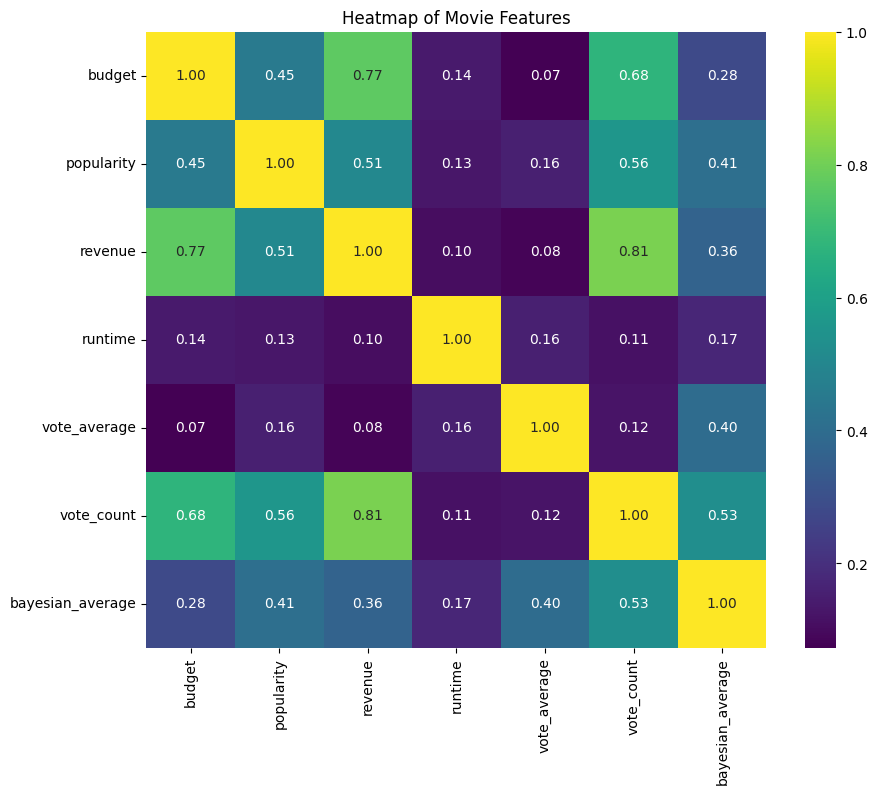

In [184]:
data = pd.read_csv('movies.csv')

# Convert columns to numeric as required
numeric_columns = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'bayesian_average']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
correlation_matrix = data[numeric_columns].corr()

# Create a heatmap with the "viridis" colormap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.title('Heatmap of Movie Features')
plt.show()

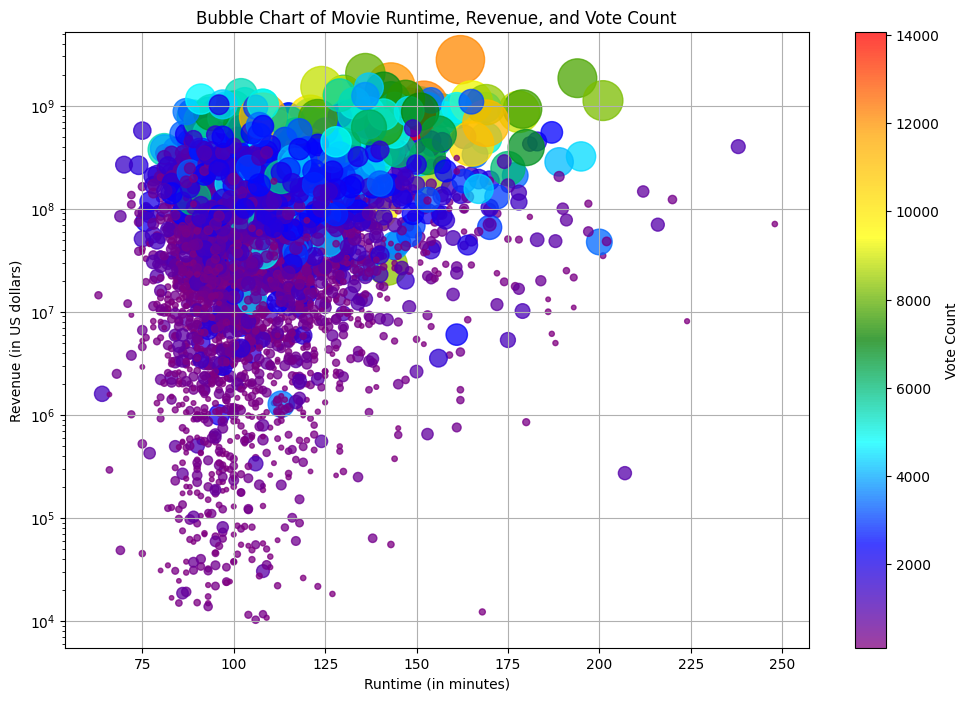

In [185]:
data = pd.read_csv('movies.csv')

# Convert necessary columns to numeric and clean data
data['runtime'] = pd.to_numeric(data['runtime'], errors='coerce')
data['revenue'] = pd.to_numeric(data['revenue'], errors='coerce')
data['vote_count'] = pd.to_numeric(data['vote_count'], errors='coerce')

# Removing entries where any of these three columns have NaN or zero values
filtered_data = data[(data['runtime'] > 50) & (data['revenue'] > 10000) & (data['vote_count'] > 100)]

# Define the custom colormap
cmap_colors = ['purple', 'blue', 'cyan', 'green', 'yellow', 'orange', 'red']
cmap_name = mcolors.LinearSegmentedColormap.from_list('custom_cmap', cmap_colors)

# Creating the bubble chart with the custom colormap
plt.figure(figsize=(12, 8))
plt.scatter(filtered_data['runtime'], filtered_data['revenue'], s=filtered_data['vote_count']/10, c=filtered_data['vote_count'], cmap=cmap_name, alpha=0.75)
plt.title('Bubble Chart of Movie Runtime, Revenue, and Vote Count')
plt.xlabel('Runtime (in minutes)')
plt.ylabel('Revenue (in US dollars)')
plt.colorbar(label='Vote Count')
plt.grid(True)
plt.yscale('log')
plt.show()

C:\Users\FredS\AppData\Local\Temp\ipykernel_12284\2629159817.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\FredS\AppData\Local\Temp\ipykernel_12284\2629159817.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\FredS\AppData\Local\Temp\ipykernel_12284\2629159817.py:25: MatplotlibDeprecationWarning:

The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.



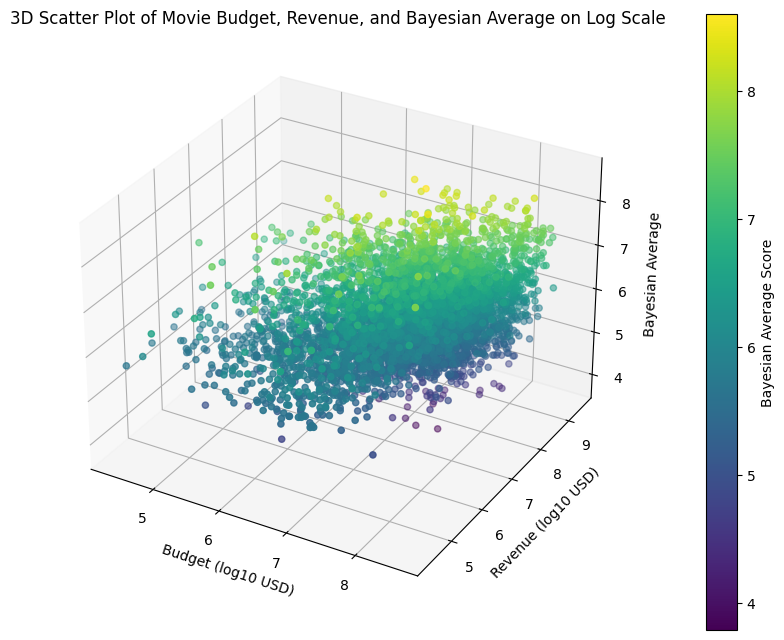

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('movies.csv')

# Assuming 'data' is your DataFrame with the movies' information

# Convert necessary columns to numeric and clean data
data['budget'] = pd.to_numeric(data['budget'], errors='coerce')
data['revenue'] = pd.to_numeric(data['revenue'], errors='coerce')
data['bayesian_average'] = pd.to_numeric(data['bayesian_average'], errors='coerce')

# Filter out rows where any of these three columns have NaN or zero values (for budget or revenue)
filtered_data = data[(data['budget'] > 20000) & (data['revenue'] > 20000) & (data['bayesian_average'] > 0)]

# Apply logarithmic transformation
filtered_data['log_budget'] = np.log10(filtered_data['budget'])
filtered_data['log_revenue'] = np.log10(filtered_data['revenue'])

# Plotting the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(filtered_data['log_budget'], filtered_data['log_revenue'], filtered_data['bayesian_average'], c=filtered_data['bayesian_average'], cmap='viridis', marker='o')

# Add labels and title
ax.set_xlabel('Budget (log10 USD)')
ax.set_ylabel('Revenue (log10 USD)')
ax.set_zlabel('Bayesian Average')
ax.set_title('3D Scatter Plot of Movie Budget, Revenue, and Bayesian Average on Log Scale')

# Color bar to show the vote average scale
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Bayesian Average Score')

plt.show()


#  Scatter Plot of Revenue vs. Budget [Filtered] 

C:\Users\FredS\AppData\Local\Temp\ipykernel_12284\461847092.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\FredS\AppData\Local\Temp\ipykernel_12284\461847092.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



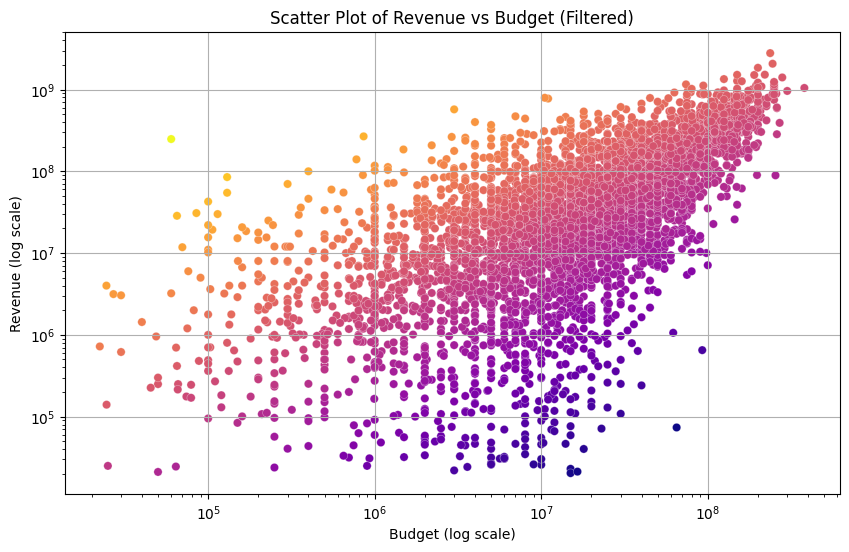

In [187]:
# Calculate profitability ratio using .loc for safe setting
filtered_data.loc[:, 'profitability'] = filtered_data['revenue'] / filtered_data['budget']

# Calculate the log of profitability and normalize it
profitability_normalized = np.log10(filtered_data['profitability'])  # Use log scale if the range is very large
max_val = profitability_normalized.max()
min_val = profitability_normalized.min()

# Use .loc to set the new column safely
filtered_data.loc[:, 'profitability_normalized'] = (profitability_normalized - min_val) / (max_val - min_val)

# Now create the scatter plot using the filtered data
plt.figure(figsize=(10, 6))

# Create a scatter plot with a color gradient that represents the normalized profitability
sns.scatterplot(x='budget', y='revenue', hue='profitability_normalized',
                palette='plasma', data=filtered_data, edgecolor=(1, 1, 1, 0.4), legend=False)

plt.xscale('log')
plt.yscale('log')
plt.title('Scatter Plot of Revenue vs Budget (Filtered)')
plt.xlabel('Budget (log scale)')
plt.ylabel('Revenue (log scale)')
plt.grid(True)

plt.show()


# CHOROPLETH MAP OF MOVIE REVENUE BY COUNTRY

In [188]:
import numpy as np


# Apply a logarithmic scale to revenue
country_revenue_df['Log_Total_Revenue'] = np.log(country_revenue_df['Total_Revenue'].replace(0, 1))

# Generate choropleth map
fig = px.choropleth(country_revenue_df,
                    locations="Country",
                    locationmode='country names',
                    color="Log_Total_Revenue",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.RdPu,
                    title="Global Movie Revenue by Country")
# Update the color bar to reflect the log scale
fig.update_layout(coloraxis_colorbar=dict(
    title="Total Revenue",
    tickvals=[np.log(1e6), np.log(1e9), np.log(1e12)],
    ticktext=['1M', '1B', '1T']
))

fig.show()


# Actor Analysis Below

In [189]:
# Read the data and select columns for analysis
data = pd.read_csv('movies.csv')
analysis = data[['budget', 'popularity', 'revenue', 'bayesian_average', 'release_date', 'genre_list', 'actor_names']].copy()

# Convert to datetime and calculate the lengths
analysis['release_date'] = pd.to_datetime(analysis['release_date'])
analysis['genre_list'] = analysis['genre_list'].apply(ast.literal_eval)  # Convert strings to lists
analysis['actor_names'] = analysis['actor_names'].apply(ast.literal_eval)  # Convert strings to lists
analysis['genre_list_lengths'] = analysis['genre_list'].apply(len)
analysis['actor_names_lengths'] = analysis['actor_names'].apply(len)

# Filter data based on conditions
filtered_analysis = analysis.loc[
    (analysis['release_date'] >= pd.to_datetime('2000-01-01')) &
    (analysis['actor_names'].apply(len) != 0)
]

# Truncate actor_names list to max 3 elements
filtered_analysis['actor_names'] = filtered_analysis['actor_names'].apply(lambda actors: actors[:3])
filtered_analysis['actor_names_lengths'] = filtered_analysis['actor_names'].apply(len)

# Reset the index of the filtered DataFrame
filtered_analysis.reset_index(drop=True, inplace=True)

C:\Users\FredS\AppData\Local\Temp\ipykernel_12284\1144948801.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\FredS\AppData\Local\Temp\ipykernel_12284\1144948801.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Most popular actors

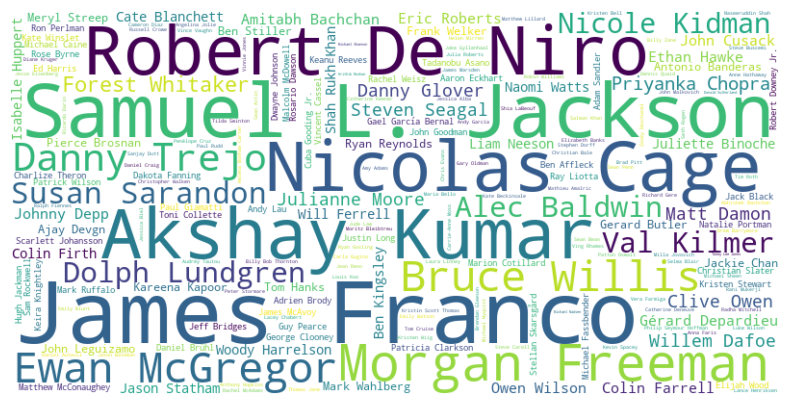

In [190]:
actors = []

for index, row in filtered_analysis.iterrows():
    for name in row['actor_names']:
        actors.append(name)

# Count word frequencies
actor_counts = pd.Series(actors).value_counts()

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(actor_counts)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Number of Movies by the Top 20 Actors

C:\Users\FredS\AppData\Local\Temp\ipykernel_12284\189911307.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




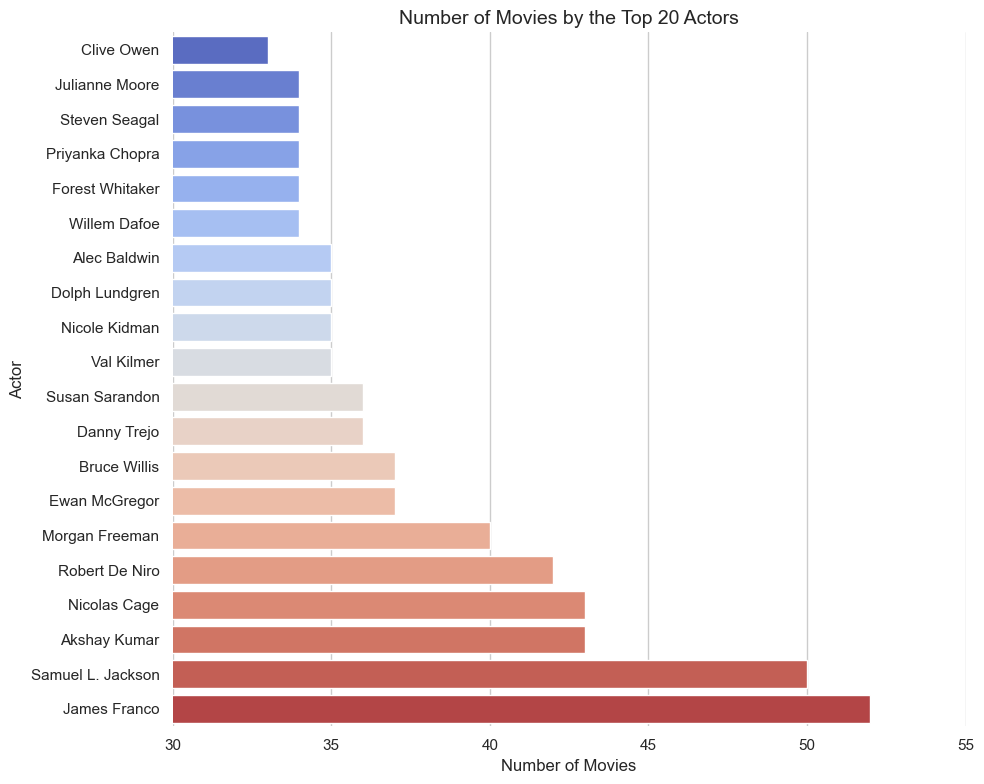

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming top_actors is a Series with actor names as the index and movie counts as the values
top_actors = top_actors.sort_values(ascending=True)  # Sort for better visualisation
x = top_actors.index
y = top_actors.values

# Set a larger figure size for better readability
plt.figure(figsize=(10, 8))

# Use seaborn for a better default color palette and styling
sns.set_style("whitegrid")

# Create the bar chart with seaborn for better color and style
sns.barplot(x=y, y=x, palette='coolwarm')

# Customize the chart
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Actor', fontsize=12)
plt.title('Number of Movies by the Top 20 Actors', fontsize=14)
plt.xlim(30, 55)
plt.xticks(range(30, 56, 5))


# Clean up the borders and axes
sns.despine(left=True, bottom=True)

# Display the chart
plt.tight_layout()  # Adjust layout
plt.show()


# Actors and their Genre Counts HEATMAP

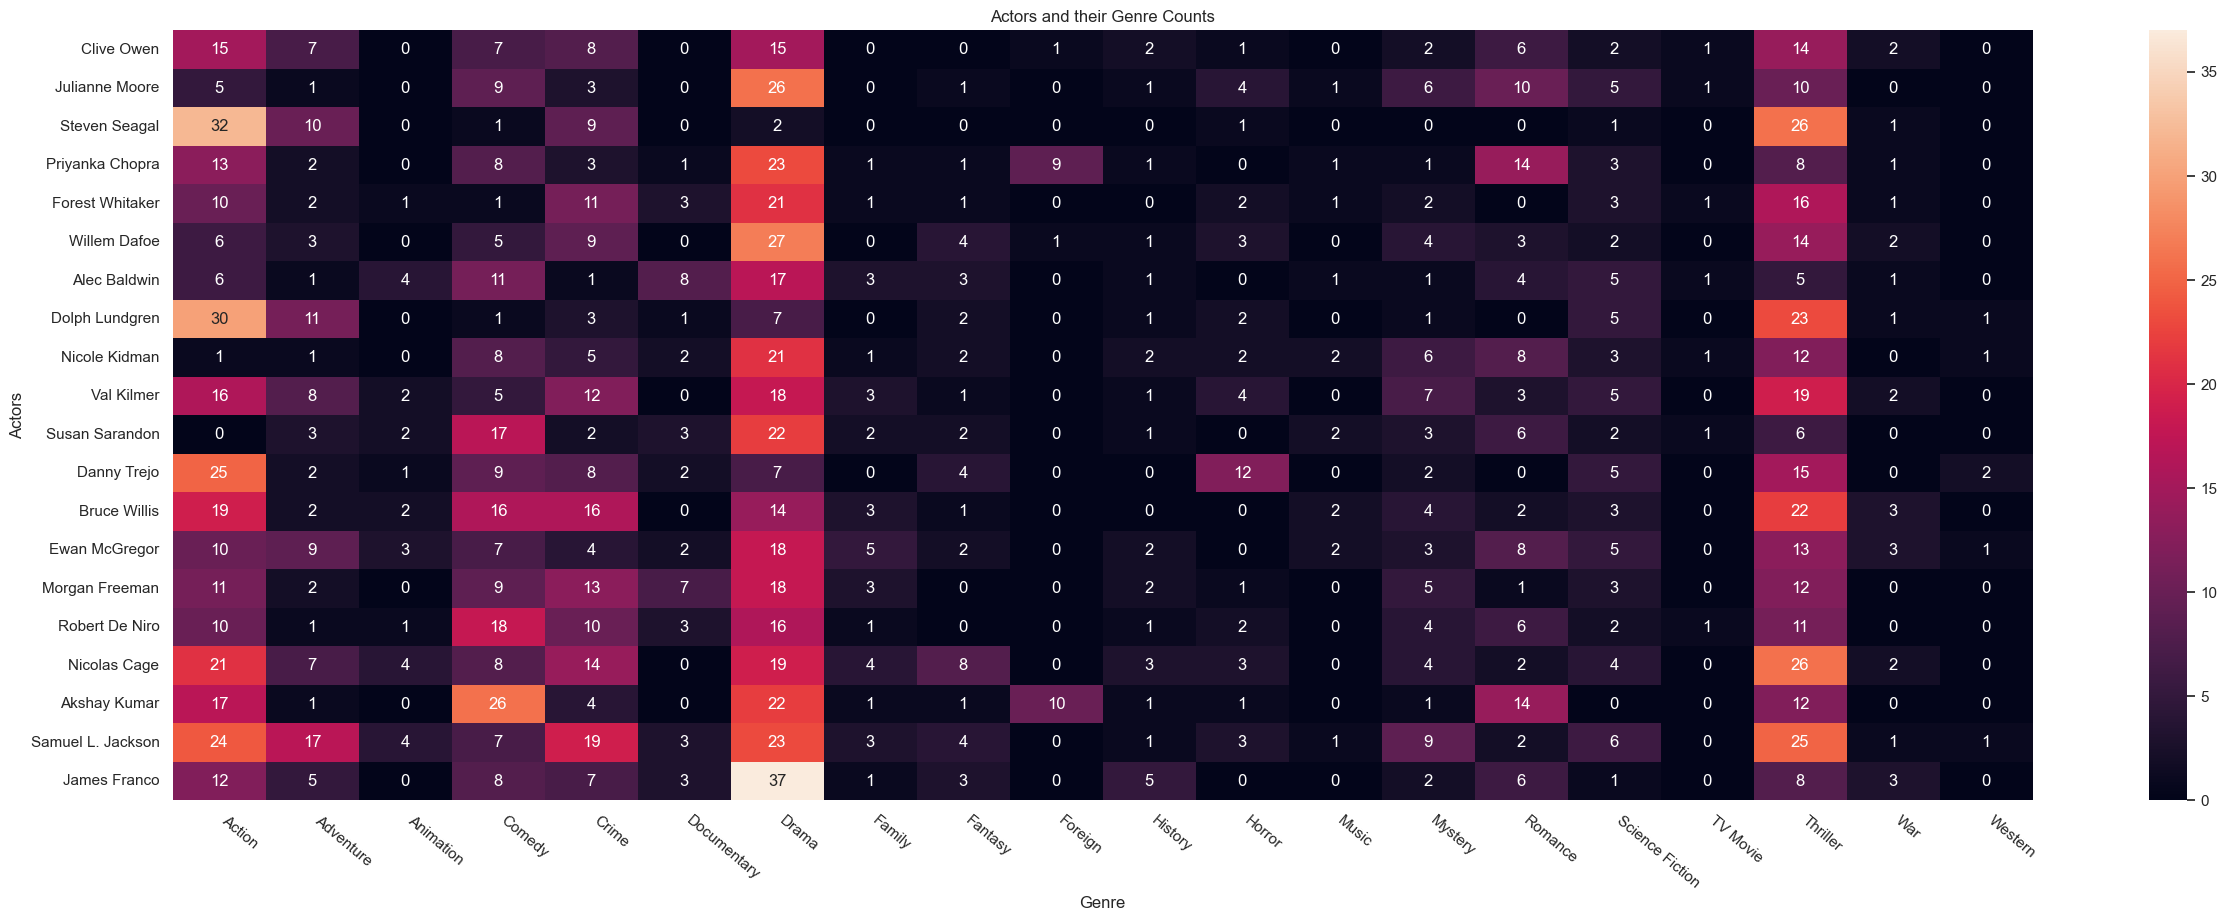

In [204]:
genre = set()

# Add genres to the set and directly update 'genre_list' column if needed
for index, row in filtered_analysis.iterrows():
    # Since 'genre_list' is already a list, we can work with it directly
    for item in row['genre_list']:
        genre.add(item)

# Now 'genre' contains all unique genres
genre_columns = sorted(genre)
actors_genre = pd.DataFrame(columns=["Actors"] + genre_columns)
actors_genre['Actors'] = top_actors.index
actors_genre.iloc[:,1:] = 0
actors_genre = actors_genre.set_index('Actors')

# Fill the DataFrame 'actors_genre' with genre counts for each actor
for index, row in filtered_analysis.iterrows():
    for actor in row['actor_names']:
        if actor in actors_genre.index:
            for gen in row['genre_list']:
                actors_genre.loc[actor, gen] += 1
                
numeric_columns = actors_genre.columns
actors_genre[numeric_columns] = actors_genre[numeric_columns].apply(pd.to_numeric)

# Create the heatmap
plt.figure(figsize=(30,10))
sns.heatmap(actors_genre, annot=True)
plt.title('Actors and their Genre Counts')
plt.xlabel('Genre')
plt.ylabel('Actors')
plt.xticks(rotation=-40, ha='left')

plt.show()

# VIOLIN PLOT OF REVENUES BY TOP DIRECTORS

C:\Users\FredS\AppData\Local\Temp\ipykernel_12284\2926622159.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




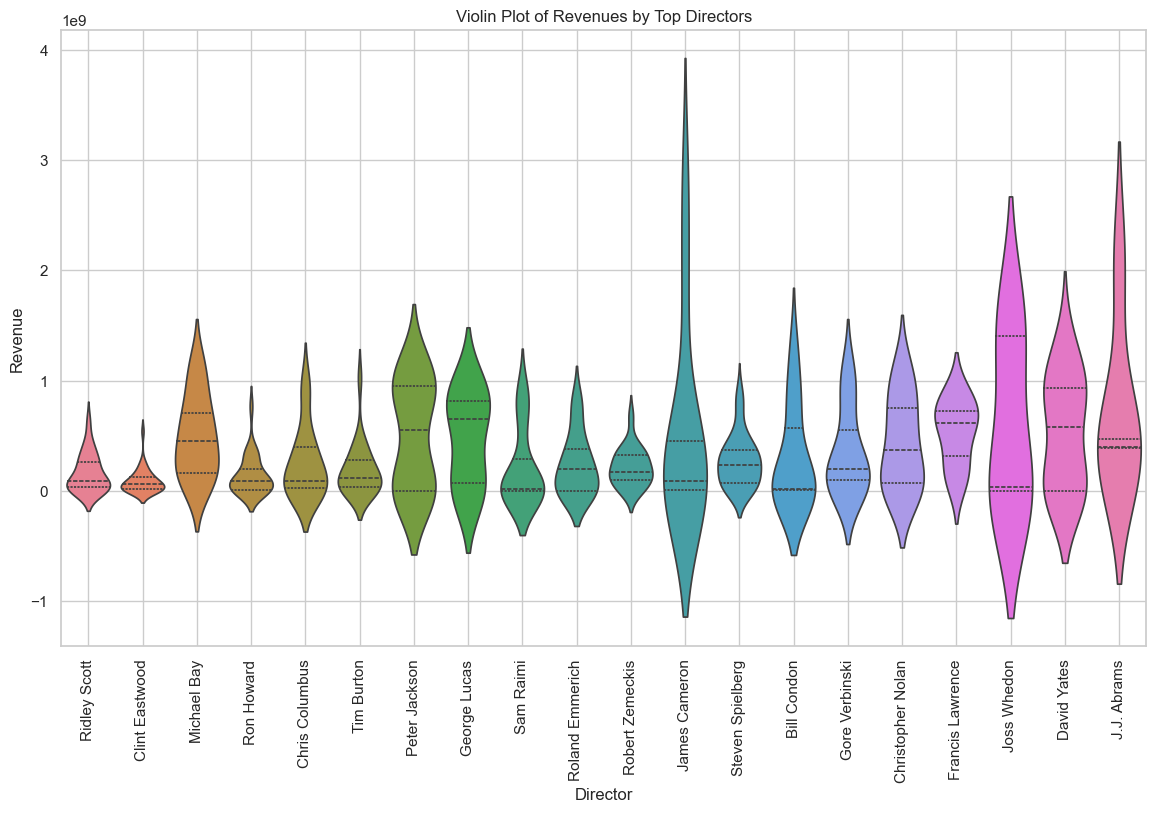

In [200]:
data = pd.read_csv('movies.csv')

# Filter directors from job_name_pairs
data['job_name_pairs'] = data['job_name_pairs'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else [])
data['director'] = data['job_name_pairs'].apply(lambda pairs: [name for job, name in pairs if job == 'Director'])
data['director'] = data['director'].apply(lambda x: x[0] if x else None)
filtered_data = data.dropna(subset=['director'])

# First, calculate the total revenue for each director and identify the top directors
director_revenue = filtered_data.groupby('director')['revenue'].sum().sort_values(ascending=False).head(20).index

# Now filter the data to include only the top directors
top_directors_data = filtered_data[filtered_data['director'].isin(director_revenue)]

# Define a custom color palette
custom_palette = sns.color_palette("husl", len(top_directors_data['director'].unique()))

# Create violin plots for the top directors
plt.figure(figsize=(14, 8))
violin_plot = sns.violinplot(data=top_directors_data, x='director', y='revenue', density_norm='width', inner='quartile', palette=custom_palette)
plt.xticks(rotation=90)
plt.title('Violin Plot of Revenues by Top Directors')
plt.xlabel('Director')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()